ELEC3612 Project 1

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
from torchvision import datasets

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from torch.utils.data import Dataset
import PIL
import os

import operator
from numpy import *
import cv2
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [ ]:
# load the file (cropped.zip) from our own google drive
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/cropped.zip" -d our_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/cropped.zip
replace our_data/cropped/1a/face/1a000.pgm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# 1. Load the dataset and split into training and testing datasets

In [ ]:
import torch
import torch.utils.data
from torchvision.datasets import ImageFolder
data_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
])

# 使用ImageFolder去读取，返回后的数据路径和标签对应起来
dataset = ImageFolder('/content/our_data/cropped', transform=data_transform)
print(dataset.class_to_idx)

print(len(dataset))
train_size = int(0.8 * len(dataset))
print(train_size)
test_size = len(dataset) - train_size
print(test_size)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size],generator=torch.Generator().manual_seed(0))
print(len(train_dataset))
print(len(test_dataset))

{'1a': 0, '1b': 1, '1c': 2, '1d': 3, '1e': 4, '1f': 5, '1g': 6, '1h': 7, '1i': 8, '1j': 9, '1k': 10, '1l': 11, '1m': 12, '1n': 13, '1o': 14, '1p': 15, '1q': 16, '1r': 17, '1s': 18, '1t': 19}
575
460
115
460
115


In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=92x112 at 0x7FDBEB09EDD0>, 0)

In [ ]:
print(train_dataset[0])
print(type(train_dataset[0]))

(<PIL.Image.Image image mode=L size=92x112 at 0x7FDBEB0A4FD0>, 0)
<class 'tuple'>


In [ ]:
im_np = np.array(train_dataset[0][0],np.float32)
print(im_np.shape)  #(112, 92)

(112, 92)


In [ ]:
print(train_dataset[0][1])
print(type(train_dataset[0][1]))

0
<class 'int'>


## 1.1 Seperating training dataset into images and labels lists

In [ ]:
img_list = []
label_list = []
for i in train_dataset:
  img_list.append(np.array(i[0]).flatten().tolist())
  label_list.append(i[1])
  # print(np.array(i[0]).flatten().tolist())

In [ ]:
print(img_list[0])
print(label_list[0])

[234, 235, 234, 233, 234, 235, 234, 233, 234, 235, 233, 233, 233, 234, 232, 231, 231, 205, 124, 86, 84, 79, 75, 72, 71, 70, 70, 71, 70, 70, 70, 63, 64, 76, 80, 83, 82, 84, 84, 85, 85, 80, 78, 75, 80, 85, 89, 86, 84, 83, 79, 79, 84, 86, 89, 91, 96, 98, 100, 104, 111, 111, 105, 103, 96, 83, 69, 55, 49, 54, 51, 51, 59, 69, 80, 97, 113, 136, 168, 191, 210, 220, 224, 231, 232, 228, 231, 233, 234, 234, 235, 235, 234, 235, 234, 233, 234, 233, 234, 233, 234, 234, 234, 235, 233, 233, 232, 231, 229, 186, 104, 82, 83, 77, 73, 72, 69, 70, 71, 72, 70, 68, 66, 62, 68, 78, 84, 82, 84, 84, 82, 86, 80, 78, 77, 77, 84, 87, 85, 82, 84, 82, 80, 84, 86, 89, 93, 97, 100, 100, 104, 112, 115, 114, 108, 106, 103, 90, 72, 57, 50, 52, 51, 51, 59, 69, 78, 92, 104, 130, 160, 179, 199, 211, 218, 227, 231, 228, 229, 231, 234, 233, 235, 233, 233, 234, 234, 234, 234, 233, 234, 233, 233, 233, 233, 234, 234, 233, 233, 227, 164, 96, 78, 78, 70, 73, 70, 68, 69, 73, 73, 69, 71, 64, 61, 71, 83, 84, 86, 87, 84, 84, 83, 84, 8

In [ ]:
print(len(img_list))

460


In [ ]:
print(img_list[1])

[228, 227, 226, 226, 227, 225, 224, 225, 224, 224, 224, 210, 177, 76, 26, 16, 11, 19, 14, 11, 18, 18, 9, 18, 15, 14, 18, 18, 16, 15, 16, 16, 19, 19, 19, 19, 15, 14, 13, 14, 14, 13, 12, 15, 15, 14, 15, 13, 14, 14, 14, 14, 15, 18, 16, 15, 13, 15, 14, 15, 13, 14, 14, 14, 13, 14, 14, 16, 19, 19, 19, 23, 23, 24, 19, 20, 19, 22, 24, 27, 37, 61, 61, 65, 72, 72, 69, 121, 127, 126, 126, 137, 226, 227, 226, 226, 225, 225, 224, 226, 224, 224, 205, 116, 72, 24, 12, 9, 16, 14, 9, 15, 16, 13, 14, 19, 15, 14, 19, 19, 14, 14, 19, 14, 19, 19, 21, 15, 16, 15, 13, 14, 14, 14, 13, 18, 15, 16, 16, 13, 14, 12, 14, 16, 19, 15, 14, 13, 18, 14, 15, 15, 13, 14, 14, 14, 13, 14, 15, 19, 19, 19, 18, 23, 23, 22, 19, 19, 22, 22, 23, 22, 30, 43, 55, 64, 72, 84, 76, 84, 114, 121, 127, 126, 226, 226, 226, 226, 225, 224, 224, 224, 207, 172, 78, 28, 20, 13, 12, 16, 18, 12, 12, 16, 14, 14, 19, 19, 15, 14, 18, 19, 14, 19, 16, 16, 19, 19, 19, 18, 18, 13, 14, 14, 14, 14, 15, 18, 16, 18, 11, 13, 14, 12, 15, 19, 16, 15, 13, 16

In [ ]:
my_np_array = np.array(img_list)
print(my_np_array.size)
print(my_np_array.shape) 

4739840
(460, 10304)


In [ ]:
my_label_np_array = np.array(label_list)
print(my_label_np_array.size)
print(my_label_np_array.shape) 

460
(460,)


## 1.2 Seperate testing dataset into images and labels lists

In [ ]:
test_img_list = []
test_label_list = []
for i in test_dataset:
  test_img_list.append(np.array(i[0]).flatten().tolist())
  test_label_list.append(i[1])
  # print(np.array(i[0]).flatten().tolist())

In [ ]:
test_my_np_array = np.array(test_img_list)
print(test_my_np_array.size)
print(test_my_np_array.shape) 

1184960
(115, 10304)


In [ ]:
test_my_label_np_array = np.array(test_label_list)
print(test_my_label_np_array.size)
print(test_my_label_np_array.shape) 

115
(115,)


In [ ]:
print(test_my_label_np_array)

[17 13  7 16 19 16 18 16  7  6  9 15  0 12  3  9 13  4  2 10  4 11 17 14
 13 18 15 18  3  3 18 12 19 19  7 19  2 16 19  4 12  6 17 13 14  9 18  9
  9 18  0  1 12 17  2 17 13  1  9 19 17 16  1 14 10  9  2  7 19  2  0 11
  0  9 19 10 11  9 18 19  8 16 16 12 12 12  1  6 12 13 13  1 11 10 18  0
 19 18  5  6  7  9  0 13 16  5 13  5  0 12  1  2  3  1 18]


## 1.3 combine images and labels from training and test sets

Used in the cross validation

In [ ]:
all_img_list = img_list+test_img_list
all_label_list = label_list+test_label_list

print(len(all_img_list))
print(len(all_label_list))

575
575


In [ ]:
print(np.array(all_img_list).shape)

(575, 10304)


# 2. Using package SVM with improvement

## 2.1 Gaussian Kernel SVM

### Default Gaussian Kernel

In [ ]:
from sklearn import svm
rbf_svm = svm.SVC(kernel='rbf') #  Guassian Kernal
rbf_svm.fit(img_list,label_list)
score_rbf = rbf_svm.score(test_img_list,test_label_list) #Return the mean accuracy on the given test data and labels.
print("The score of rbf is : %f"%score_rbf)

rbf_svm_predict = rbf_svm.predict(test_img_list)

The score of rbf is : 0.982609


In [ ]:
print(rbf_svm_predict)

[17 13  7 16 19 16 18 16  7  6  9 15  0 12  3  9 13  4  2 10  4 11 17 14
 13 18 15 18  3  3 18 12 19 19  7 19  2 16 19  4 12  6 17 13 15  9 18  9
  9 18  0  1 12 17  2 17 13  1  9 19 17 16  1 14 10  9  2  7 19  2  0 11
  0  9 19 10 11  9 18 19  8 16 16 12 12 12  1  6 12 13 13  1 11 10 18  0
 19 18  5  6  8  9  0 13 16  5 13  5  0 12  1  2  3  1 18]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
# confusion_matrix(y_true, y_pred)
print ('Confusion Matrix :')
confusion_matrix = confusion_matrix(test_label_list, rbf_svm_predict)
print(confusion_matrix)
print ('Accuracy Score is',accuracy_score(test_label_list, rbf_svm_predict))
print ('Classification Report : ')
print (classification_report(test_label_list, rbf_svm_predict))

Confusion Matrix :
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

### Gaussian kernel SVM Improvement

Changing Regularization parameter:

In [ ]:
from sklearn import svm
rbf_svm_1 = svm.SVC(C=0.5,kernel='rbf') #  Guassian Kernal
rbf_svm_1.fit(img_list,label_list)
score_rbf_1 = rbf_svm_1.score(test_img_list,test_label_list) #Return the mean accuracy on the given test data and labels.
print("The score of rbf is : %f"%score_rbf_1)

The score of rbf is : 0.921739


In [ ]:
from sklearn import svm
rbf_svm_2 = svm.SVC(C=0.3,kernel='rbf') #  Guassian Kernal
rbf_svm_2.fit(img_list,label_list)
score_rbf_2 = rbf_svm_2.score(test_img_list,test_label_list) #Return the mean accuracy on the given test data and labels.
print("The score of rbf is : %f"%score_rbf_2)

The score of rbf is : 0.791304


Text(0, 0.5, 'Score (Accuracy)')

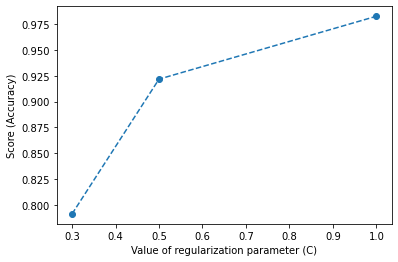

In [ ]:
x_axis = [0.3,0.5,1]
y_axis = [score_rbf_2,score_rbf_1,score_rbf]
plt.plot(x_axis,y_axis,marker = 'o',linestyle = "dashed")
plt.xlabel("Value of regularization parameter (C)")
plt.ylabel("Score (Accuracy)")

### Gaussian kernel SVM visualize

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve,auc
# confusion_matrix(y_true, y_pred)
print ('Confusion Matrix :')
confusion_matrix = confusion_matrix(test_label_list, rbf_svm_predict)
print(confusion_matrix)
print ('Accuracy Score is',accuracy_score(test_label_list, rbf_svm_predict))
print ('Classification Report : ')
print (classification_report(test_label_list, rbf_svm_predict))

Confusion Matrix :
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

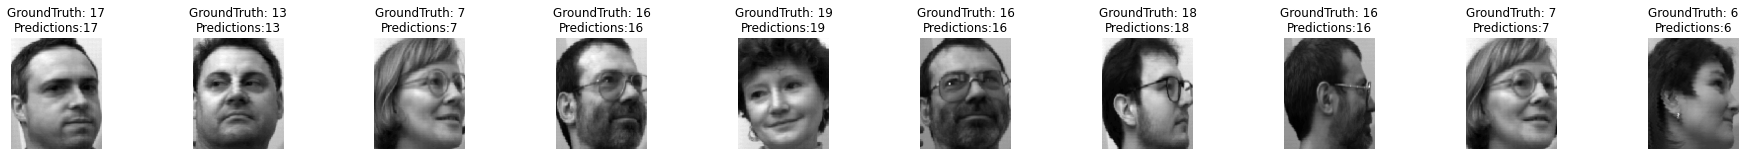

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=10)   # Visualization
plt.subplots_adjust(left=8, right=12, wspace=1)
for idx in range(10):
    ax[idx].imshow(test_dataset[idx][0], cmap='gray')
    ax[idx].axis('off')
    ax[idx].set_title(f'GroundTruth: {test_dataset[idx][1]}\nPredictions:{rbf_svm_predict[idx]}')

## 2.2 Polynomial Kernel SVM

### Default Polynomial Kernel

In [ ]:
from sklearn import svm
# kernel = 'poly'
poly_svm = svm.SVC(kernel='poly')
poly_svm.fit(img_list,label_list)
score_poly = poly_svm.score(test_img_list,test_label_list)
print("The score of poly is : %f"%score_poly)

poly_svm_predict = poly_svm.predict(test_img_list)

The score of poly is : 1.000000


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
# confusion_matrix(y_true, y_pred)
print ('Confusion Matrix :')
confusion_matrix = confusion_matrix(test_label_list, poly_svm_predict)
print(confusion_matrix)
print ('Accuracy Score is',accuracy_score(test_label_list, poly_svm_predict))
print ('Classification Report : ')
print (classification_report(test_label_list, poly_svm_predict))

Confusion Matrix :
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

### Polynomial kernel SVM Improvement

In [ ]:
from sklearn import svm
# kernel = 'poly'
poly_svm_1 = svm.SVC(kernel='poly',C = 0.05,degree = 3)
poly_svm_1.fit(img_list,label_list)
score_poly_1 = poly_svm_1.score(test_img_list,test_label_list)
print("The score of poly is : %f"%score_poly_1)

poly_svm_predict_1 = poly_svm_1.predict(test_img_list)

The score of poly is : 0.982609


In [ ]:
from sklearn import svm
# kernel = 'poly'
poly_svm_2 = svm.SVC(kernel='poly',C = 0.03,degree = 3)
poly_svm_2.fit(img_list,label_list)
score_poly_2 = poly_svm_2.score(test_img_list,test_label_list)
print("The score of poly is : %f"%score_poly_2)

poly_svm_predict_2 = poly_svm_2.predict(test_img_list)

The score of poly is : 0.965217


Text(0, 0.5, 'Score (Accuracy)')

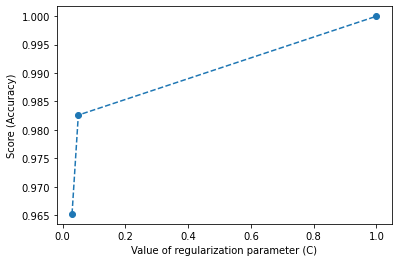

In [ ]:
x_axis = [0.03,0.05,1]
y_axis = [score_poly_2,score_poly_1,score_poly]
plt.plot(x_axis,y_axis,marker = 'o',linestyle = "dashed")
plt.xlabel("Value of regularization parameter (C)")
plt.ylabel("Score (Accuracy)")

### Polynomial SVM Visualize

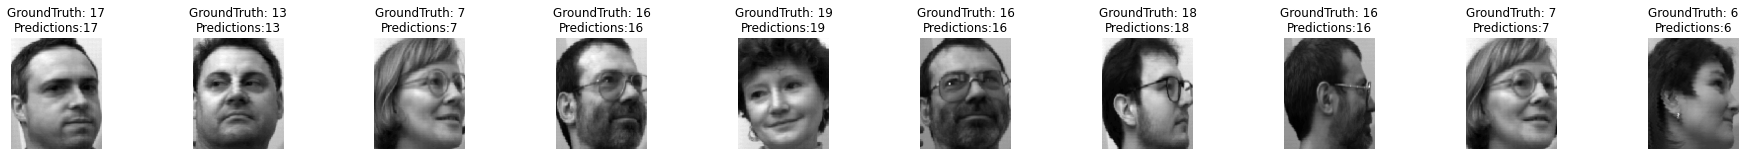

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=10)   # Visualization
plt.subplots_adjust(left=8, right=12, wspace=1)
for idx in range(10):
    ax[idx].imshow(test_dataset[idx][0], cmap='gray')
    ax[idx].axis('off')
    ax[idx].set_title(f'GroundTruth: {test_dataset[idx][1]}\nPredictions:{poly_svm_predict_1[idx]}')

# 3. PCA Calculation

### 3.1 Set up our own PCA function and compare the result with package PCA

In [ ]:
import numpy as np
 
def myPCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = -np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

X = [[1, 2, 1], [1, 1, 2], [2, 1, 1], [5, 5, 5], [5, 5, 6], [5, 7, 5]]
myPCA(X , 2)

array([[-3.41120038,  0.83183454],
       [-3.47819874, -0.54202341],
       [-3.52570756, -0.13569101],
       [ 2.85809688, -0.33844395],
       [ 3.42703665, -0.96727867],
       [ 4.12997314,  1.1516025 ]])

In [ ]:
from sklearn.decomposition import PCA
X = [[1, 2, 1], [1, 1, 2], [2, 1, 1], [5, 5, 5], [5, 5, 6], [5, 7, 5]]
X = np.array(X)
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca)

[[-3.41120038  0.83183454]
 [-3.47819874 -0.54202341]
 [-3.52570756 -0.13569101]
 [ 2.85809688 -0.33844395]
 [ 3.42703665 -0.96727867]
 [ 4.12997314  1.1516025 ]]


We could find the results are the same, which means our function is correct.

### 3.2 Then, we used our PCA function for our dataset and get Eigenface

#### Find the Eigenface for the images whose label = 0 (first person)

In [ ]:
def get_index1(lst=None, item=''):
  tmp = []
  notequal = []
  tag = 0
  for i in lst:
      if i == item:
          tmp.append(tag)
      else:
        notequal.append(tag)
      tag += 1
  return tmp, notequal

In [ ]:
print(label_list)

[0, 11, 0, 16, 1, 5, 18, 13, 19, 17, 1, 17, 14, 18, 14, 19, 12, 14, 10, 19, 11, 15, 3, 11, 5, 17, 19, 15, 3, 8, 0, 19, 10, 4, 3, 11, 18, 17, 0, 1, 17, 4, 13, 4, 1, 11, 10, 19, 19, 0, 11, 0, 5, 17, 10, 12, 12, 18, 18, 1, 13, 1, 13, 15, 12, 17, 18, 15, 15, 2, 9, 9, 6, 15, 1, 2, 6, 10, 14, 15, 17, 15, 6, 0, 11, 3, 5, 6, 4, 0, 12, 11, 18, 18, 0, 18, 1, 5, 3, 9, 3, 5, 17, 6, 12, 10, 3, 18, 0, 0, 12, 19, 16, 18, 14, 4, 18, 17, 6, 11, 14, 18, 17, 4, 19, 10, 0, 1, 1, 7, 8, 3, 3, 9, 10, 18, 14, 19, 19, 5, 18, 3, 3, 19, 0, 4, 13, 10, 14, 11, 8, 13, 2, 13, 0, 15, 15, 19, 16, 13, 9, 8, 16, 6, 7, 0, 0, 17, 16, 16, 17, 14, 0, 1, 7, 14, 5, 6, 10, 12, 19, 17, 5, 13, 2, 2, 10, 13, 16, 7, 1, 18, 9, 12, 7, 8, 8, 7, 2, 2, 16, 5, 6, 18, 15, 9, 10, 2, 9, 18, 1, 13, 7, 17, 4, 1, 9, 12, 11, 15, 10, 2, 5, 12, 5, 15, 18, 10, 13, 2, 2, 18, 8, 15, 7, 8, 8, 5, 12, 6, 15, 11, 14, 18, 4, 13, 9, 13, 17, 5, 0, 9, 11, 1, 6, 1, 17, 7, 14, 15, 11, 6, 4, 0, 1, 14, 1, 10, 6, 1, 8, 4, 11, 9, 18, 1, 4, 8, 10, 2, 5, 16, 13, 0

In [ ]:
index_list_0, notequal_0 = get_index1(all_label_list, 0) #index_list储存label为0的index，notequal_0储存不是0的index
class_list_0 = []
label_list_0 = []
for i in index_list_0:
  class_list_0.append(all_img_list[i])
  label_list_0.append(0)
print(len(class_list_0))

#31个label为0的图像在tain_dataset里 80%

new_image_0_array = np.array(class_list_0)
new_label_0_array = np.array(label_list_0)

print(new_image_0_array.shape)
print(new_label_0_array)
print(new_label_0_array.shape)

38
(38, 10304)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
(38,)


In [ ]:
pca = PCA(10)
pca.fit(new_image_0_array)
img_0_pca = pca.transform(new_image_0_array)
print(img_0_pca.shape)

(38, 10)


In [ ]:
for i in range(0,len(new_label_0_array)):
  reconstructed_img_0 = np.mean(new_image_0_array) + np.matmul(img_0_pca[i],pca.components_)
print(reconstructed_img_0.shape)

(10304,)


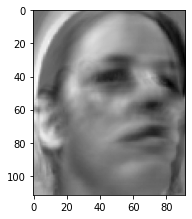

In [ ]:

plt.imshow(reconstructed_img_0.reshape(112,92),cmap = 'gray')

#### Find Eigenface for all the images

In [ ]:
# np.array(all_img_list) #shape is (575, 10304)

pca = PCA(100)
pca.fit(np.array(all_img_list))
img_pca = pca.transform(np.array(all_img_list))
print(img_pca.shape)

for i in range(0,len(all_label_list)):
  reconstructed_img = np.mean(np.array(all_img_list)) + np.matmul(img_pca[i],pca.components_)
print(reconstructed_img.shape)


(575, 100)
(10304,)


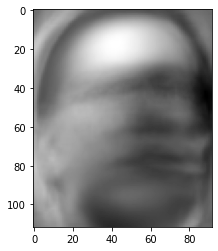

In [ ]:
plt.imshow(pca.components_[0].reshape(112,92),cmap = 'gray')

(10304,)


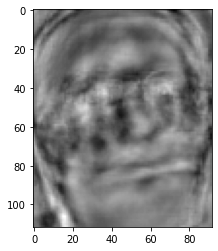

In [ ]:
component_img = pca.components_[0]
for i in range(1,100):
  component_img = component_img+pca.components_[i]
print(component_img.shape)
plt.imshow(component_img.reshape(112,92),cmap = 'gray')

Reconstructed the face

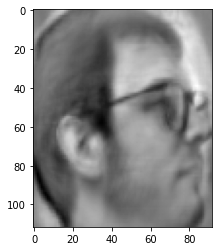

In [ ]:
plt.imshow(reconstructed_img.reshape(112,92),cmap = 'gray')

# 4. Logistic Regression Calculation (binary + OvR/OvA) with improvement


## 4.1 Change list to nparray (used for Logistic Regression)

In [ ]:
X_train = my_np_array
y_train = my_label_np_array
X_test = test_my_np_array
y_test = test_my_label_np_array
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(460, 10304) (460,)
(115, 10304) (115,)


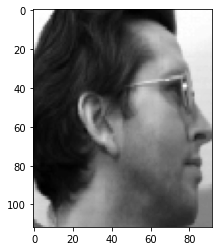

Index: 1; Label: 1


In [ ]:
# Check one data
example_idx = 1  # index
# example_idx = 4221
plt.imshow(np.reshape(X_train[example_idx], (112, 92)), cmap='gray')
plt.show()
print('Index: {}; Label: {}'.format(example_idx, y_train[example_idx]))

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(460, 10304) (460,)
(115, 10304) (115,)


## 4.2 Set up binary Logistic Regression class


In [ ]:
import numpy as np
 
 
class LogisticRegression(object):
 
    def __init__(self, learning_rate=0.1, max_iter=100, seed=None):
        self.seed = seed
        self.lr = learning_rate
        self.max_iter = max_iter
 
    def fit(self, x, y):
        np.random.seed(self.seed)
        self.w = np.random.normal(loc=0.0, scale=1.0, size=x.shape[1])
        self.b = np.random.normal(loc=0.0, scale=1.0)
        self.x = x
        self.y = y
        for i in range(self.max_iter):
            self._update_step()
 
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
 
    def _f(self, x, w, b):
        z = x.dot(w) + b
        return self._sigmoid(z)
 
    def predict_proba(self, x=None):
        if x is None:
            x = self.x
        y_pred = self._f(x, self.w, self.b)
        return y_pred
 
    def predict(self, x=None):
        if x is None:
            x = self.x
        y_pred_proba = self._f(x, self.w, self.b)
        y_pred = np.array([0 if y_pred_proba[i] < 0.5 else 1 for i in range(len(y_pred_proba))])
        return y_pred
 
    def score(self, y_true=None, y_pred=None):
        if y_true is None or y_pred is None:
            y_true = self.y
            y_pred = self.predict()
        acc = np.mean([1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))])
        return acc
 
    def loss(self, y_true=None, y_pred_proba=None):
        if y_true is None or y_pred_proba is None:
            y_true = self.y
            y_pred_proba = self.predict_proba()
        return np.mean(-1.0 * ((y_true * np.log(y_pred_proba) + (1.0 - y_true) * np.log(1.0 - y_pred_proba))))
 
    def _calc_gradient(self):
        y_pred = self.predict()
        d_w = (y_pred - self.y).dot(self.x) / len(self.y)
        d_b = np.mean(y_pred - self.y)
        return d_w, d_b
 
    def _update_step(self):
        d_w, d_b = self._calc_gradient()
        self.w = self.w - self.lr * d_w
        self.b = self.b - self.lr * d_b
        return self.w, self.b

## 4.3 Train 20 binary Logistic Regression classifiers, based on OvR (OvA) (e.g. 0 and non-zero，...,19 and non-19)

Get a list of indexes of a certain value which equals to "item" in a list. And a list of indexes whose values are not equals to "item"

In [ ]:
def get_index1(lst=None, item=''):
  tmp = []
  notequal = []
  tag = 0
  for i in lst:
      if i == item:
          tmp.append(tag)
      else:
        notequal.append(tag)
      tag += 1
  return tmp, notequal

# list1 = [[1,2,3],[3,2,1],[0,1,3],[4,1,2]]
# list2 = [1,0,1,4]

# index_list = get_index1(list2, 1)
# class_list_1 = []
# for i in index_list:
#   class_list_1.append(list1[i])
# print(class_list_1)

### Training 20 binary classifiers

#### 0 classifier

Notice that, in this classifier，change the label of the images is not equal to 0 to 1.

In [ ]:
index_list_0, notequal_0 = get_index1(label_list, 0) #index_list store the index which label=0，notequal_0 store the index which label not 0
class_list_0 = []
label_list_0 = []
for i in index_list_0:
  class_list_0.append(img_list[i])
  label_list_0.append(0)
print(len(class_list_0))

# 80% in tain_dataset

new_image_0_array = np.array(class_list_0)
new_label_0_array = np.array(label_list_0)

# print(new_image_0_array.shape)
# print(new_label_0_array)
# print(new_label_0_array.shape)

# training set implemnt "0" and "non-0"classifer,img_list not changed，only label changed

label_0_np_array = my_label_np_array.copy() #copy label
for i in notequal_0:
  label_0_np_array[i] = 1

print(label_0_np_array)

#testing set implemnt "0" and "non-0"classifer,img_list not changed，only label changed
test_index_list_0, test_notequal_0 = get_index1(test_label_list, 0)

test_label_0_np_array = test_my_label_np_array.copy() #copy label
print(test_label_0_np_array)
for i in test_notequal_0:
  test_label_0_np_array[i] = 1

print(test_label_0_np_array)

X_train = my_np_array
y_train_0 = label_0_np_array
X_test = test_my_np_array
y_test_0 = test_label_0_np_array
print(X_train.shape, y_train_0.shape)
print(X_test.shape, y_test_0.shape)


30
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8

In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf0 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf0.fit(x_train, y_train_0)

#### 1 classifier

<注意>此分类器中，把不是label=1的图像对应的label变成1,是label=1的图像变成0

In [ ]:
index_list_1, notequal_1 = get_index1(label_list, 1) #index_list储存label为0的index，notequal_0储存不是0的index
label_list_1 = []
for i in index_list_1:
  label_list_1.append(1)
print(len(label_list_1))

#label为1的图像在tain_dataset里 80%
new_label_1_array = np.array(label_list_1)

# #training set中实现"0"和"非0"分类器,img_list不变，只有label改变

label_1_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_1: #为1的index
  label_1_np_array[i] = 0
for i in notequal_1: #不为1的index
  label_1_np_array[i] = 1

print(label_1_np_array)

#testing set中实现"0"和"非0"分类器,img_list不变，只有label改变
test_index_list_1, test_notequal_1 = get_index1(test_label_list, 1) #test_index_list储存test dataset中label为0的index，test_notequal_0储存不是0的index

test_label_1_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_1_np_array)

for i in test_index_list_1:
  test_label_1_np_array[i] = 0

# print(test_label_1_np_array)
for i in test_notequal_1:
  test_label_1_np_array[i] = 1

print(test_label_1_np_array)

X_train = my_np_array
y_train_1 = label_1_np_array
X_test = test_my_np_array
y_test_1 = test_label_1_np_array

28
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8

In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf1 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf1.fit(x_train, y_train_1)

#### 2 classifier

In [ ]:
index_list_2, notequal_2 = get_index1(label_list, 2) #index_list储存label为2的index，notequal_2储存不是2的index
label_list_2 = []
for i in index_list_2:
  label_list_2.append(2)
print(len(label_list_2))
# print(label_list_2)

# 20个label为2的图像在tain_dataset里 80%
new_label_2_array = np.array(label_list_2)

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_2_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_2:
  label_2_np_array[i] = 0
for i in notequal_2:
  label_2_np_array[i] = 1

print(label_2_np_array)

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_2, test_notequal_2 = get_index1(test_label_list, 2) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_2_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_2_np_array)
for i in test_index_list_2:
  test_label_2_np_array[i] = 0
for i in test_notequal_2:
  test_label_2_np_array[i] = 1

print(test_label_2_np_array)

X_train = my_np_array
y_train_2 = label_2_np_array
X_test = test_my_np_array
y_test_2 = test_label_2_np_array

21
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8

In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf2 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf2.fit(x_train, y_train_2)

#### 3 classifier

In [ ]:
index_list_3, notequal_3 = get_index1(label_list, 3) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_3_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_3:
  label_3_np_array[i] = 0
for i in notequal_3:
  label_3_np_array[i] = 1

print(label_3_np_array)

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_3, test_notequal_3 = get_index1(test_label_list, 3) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_3_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_3_np_array)
for i in test_index_list_3:
  test_label_3_np_array[i] = 0
for i in test_notequal_3:
  test_label_3_np_array[i] = 1

print(test_label_3_np_array)

X_train = my_np_array
y_train_3 = label_3_np_array
X_test = test_my_np_array
y_test_3 = test_label_3_np_array
print(X_train.shape, y_train_3.shape)
print(X_test.shape, y_test_3.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4

In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf3 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf3.fit(x_train, y_train_3)



#### 4 classifier

In [ ]:
index_list_4, notequal_4 = get_index1(label_list, 4) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_4_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_4:
  label_4_np_array[i] = 0
for i in notequal_4:
  label_4_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_4, test_notequal_4 = get_index1(test_label_list, 4) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_4_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_4_np_array)
for i in test_index_list_4:
  test_label_4_np_array[i] = 0
for i in test_notequal_4:
  test_label_4_np_array[i] = 1

print(test_label_4_np_array)

X_train = my_np_array
y_train_4 = label_4_np_array
X_test = test_my_np_array
y_test_4 = test_label_4_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf4 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf4.fit(x_train, y_train_4)

#### 5 classifier

In [ ]:
index_list_5, notequal_5 = get_index1(label_list, 5) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_5_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_5:
  label_5_np_array[i] = 0
for i in notequal_5:
  label_5_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_5, test_notequal_5 = get_index1(test_label_list, 5) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_5_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_5_np_array)
for i in test_index_list_5:
  test_label_5_np_array[i] = 0
for i in test_notequal_5:
  test_label_5_np_array[i] = 1

print(test_label_5_np_array)

X_train = my_np_array
y_train_5 = label_5_np_array
X_test = test_my_np_array
y_test_5 = test_label_5_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf5 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf5.fit(x_train, y_train_5)


#### 6 classifier

In [ ]:
index_list_6, notequal_6 = get_index1(label_list, 6) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_6_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_6:
  label_6_np_array[i] = 0
for i in notequal_6:
  label_6_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_6, test_notequal_6 = get_index1(test_label_list, 6) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_6_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_6_np_array)
for i in test_index_list_6:
  test_label_6_np_array[i] = 0
for i in test_notequal_6:
  test_label_6_np_array[i] = 1

print(test_label_6_np_array)

X_train = my_np_array
y_train_6 = label_6_np_array
X_test = test_my_np_array
y_test_6 = test_label_6_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf6 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf6.fit(x_train, y_train_6)


#### 7 classifier

In [ ]:
index_list_7, notequal_7 = get_index1(label_list, 7) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_7_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_7:
  label_7_np_array[i] = 0
for i in notequal_7:
  label_7_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_7, test_notequal_7 = get_index1(test_label_list, 7) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_7_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_7_np_array)
for i in test_index_list_7:
  test_label_7_np_array[i] = 0
for i in test_notequal_7:
  test_label_7_np_array[i] = 1

print(test_label_7_np_array)

X_train = my_np_array
y_train_7 = label_7_np_array
X_test = test_my_np_array
y_test_7 = test_label_7_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf7 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf7.fit(x_train, y_train_7)


#### 8 classifier

In [ ]:
index_list_8, notequal_8 = get_index1(label_list, 8) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_8_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_8:
  label_8_np_array[i] = 0
for i in notequal_8:
  label_8_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_8, test_notequal_8 = get_index1(test_label_list, 8) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_8_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_8_np_array)
for i in test_index_list_8:
  test_label_8_np_array[i] = 0
for i in test_notequal_8:
  test_label_8_np_array[i] = 1

print(test_label_8_np_array)

X_train = my_np_array
y_train_8 = label_8_np_array
X_test = test_my_np_array
y_test_8 = test_label_8_np_array
print(X_train.shape, y_train_8.shape)
print(X_test.shape, y_test_8.shape)

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(460, 10304) (460,)
(115, 10304) (115,)


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf8 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf8.fit(x_train, y_train_8)


#### 9 classifier

In [ ]:
index_list_9, notequal_9 = get_index1(label_list, 9) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_9_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_9:
  label_9_np_array[i] = 0
for i in notequal_9:
  label_9_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_9, test_notequal_9 = get_index1(test_label_list, 9) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_9_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_9_np_array)
for i in test_index_list_9:
  test_label_9_np_array[i] = 0
for i in test_notequal_9:
  test_label_9_np_array[i] = 1

print(test_label_9_np_array)

X_train = my_np_array
y_train_9 = label_9_np_array
X_test = test_my_np_array
y_test_9 = test_label_9_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf9 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf9.fit(x_train, y_train_9)

#### 10 classifier

In [ ]:
index_list_10, notequal_10 = get_index1(label_list, 10) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_10_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_10:
  label_10_np_array[i] = 0
for i in notequal_10:
  label_10_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_10, test_notequal_10 = get_index1(test_label_list, 10) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_10_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_10_np_array)
for i in test_index_list_10:
  test_label_10_np_array[i] = 0
for i in test_notequal_10:
  test_label_10_np_array[i] = 1

print(test_label_10_np_array)

X_train = my_np_array
y_train_10 = label_10_np_array
X_test = test_my_np_array
y_test_10 = test_label_10_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf10 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf10.fit(x_train, y_train_10)

#### 11 classifier

In [ ]:
index_list_11, notequal_11 = get_index1(label_list, 11) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_11_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_11:
  label_11_np_array[i] = 0
for i in notequal_11:
  label_11_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_11, test_notequal_11 = get_index1(test_label_list, 11) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_11_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_11_np_array)
for i in test_index_list_11:
  test_label_11_np_array[i] = 0
for i in test_notequal_11:
  test_label_11_np_array[i] = 1

print(test_label_11_np_array)

X_train = my_np_array
y_train_11 = label_11_np_array
X_test = test_my_np_array
y_test_11 = test_label_11_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf11 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf11.fit(x_train, y_train_11)


#### 12 classifier

In [ ]:
index_list_12, notequal_12 = get_index1(label_list, 12) #index_list储存label为2的index，notequal_2储存不是2的index

# #training set中实现"2"和"非2"分类器,img_list不变，只有label改变
label_12_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_12:
  label_12_np_array[i] = 0
for i in notequal_12:
  label_12_np_array[i] = 1

#testing set中实现"2"和"非2"分类器,img_list不变，只有label改变
test_index_list_12, test_notequal_12 = get_index1(test_label_list, 12) #test_index_list储存test dataset中label为2的index，test_notequal_2储存不是2的index
test_label_12_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_12_np_array)
for i in test_index_list_12:
  test_label_12_np_array[i] = 0
for i in test_notequal_12:
  test_label_12_np_array[i] = 1

print(test_label_12_np_array)

X_train = my_np_array
y_train_12 = label_12_np_array
X_test = test_my_np_array
y_test_12 = test_label_12_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf12 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf12.fit(x_train, y_train_12)


#### 13 classifier

In [ ]:
index_list_13, notequal_13 = get_index1(label_list, 13) #index_list储存label为13的index，notequal_13储存不是13的index

# #training set中实现"13"和"非13"分类器,img_list不变，只有label改变
label_13_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_13:
  label_13_np_array[i] = 0
for i in notequal_13:
  label_13_np_array[i] = 1

#testing set中实现"13"和"非13分类器,img_list不变，只有label改变
test_index_list_13, test_notequal_13 = get_index1(test_label_list, 13) #test_index_list储存test dataset中label为13的index，test_notequal_13储存不是2的index
test_label_13_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_13_np_array)
for i in test_index_list_13:
  test_label_13_np_array[i] = 0
for i in test_notequal_13:
  test_label_13_np_array[i] = 1

print(test_label_13_np_array)

X_train = my_np_array
y_train_13 = label_13_np_array
X_test = test_my_np_array
y_test_13 = test_label_13_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf13 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf13.fit(x_train, y_train_13)


#### 14 classifier

In [ ]:
index_list_14, notequal_14 = get_index1(label_list, 14) #index_list储存label为14的index，notequal_14储存不是14的index

# #training set中实现"14"和"非14"分类器,img_list不变，只有label改变
label_14_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_14:
  label_14_np_array[i] = 0
for i in notequal_14:
  label_14_np_array[i] = 1

#testing set中实现"14"和"非14"分类器,img_list不变，只有label改变
test_index_list_14, test_notequal_14 = get_index1(test_label_list, 14) #test_index_list储存test dataset中label为14的index，test_notequal_14储存不是2的index
test_label_14_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_14_np_array)
for i in test_index_list_14:
  test_label_14_np_array[i] = 0
for i in test_notequal_14:
  test_label_14_np_array[i] = 1

print(test_label_14_np_array)

X_train = my_np_array
y_train_14 = label_14_np_array
X_test = test_my_np_array
y_test_14 = test_label_14_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf14 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf14.fit(x_train, y_train_14)


#### 15 classifier

In [ ]:
index_list_15, notequal_15 = get_index1(label_list, 15) #index_list储存label为14的index，notequal_14储存不是14的index

# #training set中实现"14"和"非14"分类器,img_list不变，只有label改变
label_15_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_15:
  label_15_np_array[i] = 0
for i in notequal_15:
  label_15_np_array[i] = 1

#testing set中实现"14"和"非14"分类器,img_list不变，只有label改变
test_index_list_15, test_notequal_15 = get_index1(test_label_list, 15) #test_index_list储存test dataset中label为14的index，test_notequal_14储存不是2的index
test_label_15_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_15_np_array)
for i in test_index_list_15:
  test_label_15_np_array[i] = 0
for i in test_notequal_15:
  test_label_15_np_array[i] = 1

print(test_label_15_np_array)

X_train = my_np_array
y_train_15 = label_15_np_array
X_test = test_my_np_array
y_test_15 = test_label_15_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf15 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf15.fit(x_train, y_train_15)

#### 16 classifier

In [ ]:
index_list_16, notequal_16 = get_index1(label_list, 16) #index_list储存label为14的index，notequal_14储存不是14的index

# #training set中实现"14"和"非14"分类器,img_list不变，只有label改变
label_16_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_16:
  label_16_np_array[i] = 0
for i in notequal_16:
  label_16_np_array[i] = 1

#testing set中实现"14"和"非14"分类器,img_list不变，只有label改变
test_index_list_16, test_notequal_16 = get_index1(test_label_list, 16) #test_index_list储存test dataset中label为14的index，test_notequal_14储存不是2的index
test_label_16_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_16_np_array)
for i in test_index_list_16:
  test_label_16_np_array[i] = 0
for i in test_notequal_16:
  test_label_16_np_array[i] = 1

print(test_label_16_np_array)

X_train = my_np_array
y_train_16 = label_16_np_array
X_test = test_my_np_array
y_test_16 = test_label_16_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf16 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf16.fit(x_train, y_train_16)

#### 17 classifier

In [ ]:
index_list_17, notequal_17 = get_index1(label_list, 17) #index_list储存label为14的index，notequal_14储存不是14的index

# #training set中实现"14"和"非14"分类器,img_list不变，只有label改变
label_17_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_17:
  label_17_np_array[i] = 0
for i in notequal_17:
  label_17_np_array[i] = 1

#testing set中实现"14"和"非14"分类器,img_list不变，只有label改变
test_index_list_17, test_notequal_17 = get_index1(test_label_list, 17) #test_index_list储存test dataset中label为14的index，test_notequal_14储存不是2的index
test_label_17_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_17_np_array)
for i in test_index_list_17:
  test_label_17_np_array[i] = 0
for i in test_notequal_17:
  test_label_17_np_array[i] = 1

print(test_label_17_np_array)

X_train = my_np_array
y_train_17 = label_17_np_array
X_test = test_my_np_array
y_test_17 = test_label_17_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf17 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf17.fit(x_train, y_train_17)


#### 18 classifier

In [ ]:
index_list_18, notequal_18 = get_index1(label_list, 18) #index_list储存label为14的index，notequal_14储存不是14的index

# #training set中实现"14"和"非14"分类器,img_list不变，只有label改变
label_18_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_18:
  label_18_np_array[i] = 0
for i in notequal_18:
  label_18_np_array[i] = 1

#testing set中实现"14"和"非14"分类器,img_list不变，只有label改变
test_index_list_18, test_notequal_18 = get_index1(test_label_list, 18) #test_index_list储存test dataset中label为14的index，test_notequal_14储存不是2的index
test_label_18_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_18_np_array)
for i in test_index_list_18:
  test_label_18_np_array[i] = 0
for i in test_notequal_18:
  test_label_18_np_array[i] = 1

print(test_label_18_np_array)

X_train = my_np_array
y_train_18 = label_18_np_array
X_test = test_my_np_array
y_test_18 = test_label_18_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf18 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf18.fit(x_train, y_train_18)


#### 19 classifier

In [ ]:
index_list_19, notequal_19 = get_index1(label_list, 19) #index_list储存label为14的index，notequal_14储存不是14的index

# #training set中实现"14"和"非14"分类器,img_list不变，只有label改变
label_19_np_array = my_label_np_array.copy() #copy一份label
for i in index_list_19:
  label_19_np_array[i] = 0
for i in notequal_19:
  label_19_np_array[i] = 1

#testing set中实现"14"和"非14"分类器,img_list不变，只有label改变
test_index_list_19, test_notequal_19 = get_index1(test_label_list, 19) #test_index_list储存test dataset中label为14的index，test_notequal_14储存不是2的index
test_label_19_np_array = test_my_label_np_array.copy() #copy一份label
print(test_label_19_np_array)
for i in test_index_list_19:
  test_label_19_np_array[i] = 0
for i in test_notequal_19:
  test_label_19_np_array[i] = 1

print(test_label_19_np_array)

X_train = my_np_array
y_train_19 = label_19_np_array
X_test = test_my_np_array
y_test_19 = test_label_19_np_array

[14 14 16 18  3  1  8  8 16  2 10 19 10  2 12  7  2 16  7 19  8  4  5 14
 18  1  9 15 12 12 15 10 13  9 17  6  4 16 10  4 10 17  0  0  0  9  0 11
 17 11 19 19  8 10 18  3 13 18  3  5 18 11  9  5 16  6 15  2  7  0 17  4
  0  6 15  4 14  1  1 12 19 17  3 11 19  0 18 13  5 18 18 13  9 10 11 12
  9 17 17  5  6  3  1 13  1  2 13 18 11 11 15 19  7  1  0]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1]


In [ ]:
# data normalization
x_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
x_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
 
# Logistic regression classifier
clf19 = LogisticRegression(learning_rate=0.1, max_iter=1000, seed=272)
clf19.fit(x_train, y_train_19)


### Calculate the prediction results from each 20 binary classifiers and their prediction scores

In [ ]:
y_test_pred_0 = clf0.predict(x_test)
print(y_test_pred_0)
y_test_pred_proba_0 = clf0.predict_proba(x_test)
print(clf0.score(y_test_0, y_test_pred_0))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0]
0.9478260869565217


In [ ]:
y_test_pred_1 = clf1.predict(x_test)
print(y_test_pred_1)
y_test_pred_proba_1 = clf1.predict_proba(x_test)
print(clf1.score(y_test_1, y_test_pred_1))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1]
0.9652173913043478


In [ ]:
y_test_pred_2 = clf2.predict(x_test)
print(y_test_pred_2)
y_test_pred_proba_2 = clf2.predict_proba(x_test)
print(clf2.score(y_test_2, y_test_pred_2))

[1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1]
0.9652173913043478


In [ ]:
y_test_pred_3 = clf3.predict(x_test)
print(y_test_pred_3)
y_test_pred_proba_3 = clf3.predict_proba(x_test)
print(clf3.score(y_test_3, y_test_pred_3))

[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1]
0.9391304347826087


In [ ]:
y_test_pred_4 = clf4.predict(x_test)
print(y_test_pred_4)
y_test_pred_proba_4 = clf4.predict_proba(x_test)
print(clf4.score(y_test_4, y_test_pred_4))

[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9478260869565217


In [ ]:
y_test_pred_5 = clf5.predict(x_test)
print(y_test_pred_5)
y_test_pred_proba_5 = clf5.predict_proba(x_test)
print(clf5.score(y_test_5, y_test_pred_5))

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9565217391304348


In [ ]:
y_test_pred_6 = clf6.predict(x_test)
print(y_test_pred_6)
y_test_pred_proba_6 = clf6.predict_proba(x_test)
print(clf6.score(y_test_6, y_test_pred_6))

[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9478260869565217


In [ ]:
y_test_pred_7 = clf7.predict(x_test)
print(y_test_pred_7)
y_test_pred_proba_7 = clf7.predict_proba(x_test)
print(clf7.score(y_test_7, y_test_pred_7))

[0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1]
0.9217391304347826


In [ ]:

y_test_pred_8 = clf8.predict(x_test)
print(y_test_pred_8)
y_test_pred_proba_8 = clf8.predict_proba(x_test)
print(clf8.score(y_test_8, y_test_pred_8))

[1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9565217391304348


In [ ]:
y_test_pred_9 = clf9.predict(x_test)
print(y_test_pred_9)
y_test_pred_proba_9 = clf9.predict_proba(x_test)
print(clf9.score(y_test_9, y_test_pred_9))

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9391304347826087


In [ ]:
y_test_pred_10 = clf10.predict(x_test)
print(y_test_pred_10)
y_test_pred_proba_10 = clf10.predict_proba(x_test)
print(clf10.score(y_test_10, y_test_pred_10))

[1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9826086956521739


In [ ]:
y_test_pred_11 = clf11.predict(x_test)
print(y_test_pred_11)
y_test_pred_proba_11 = clf11.predict_proba(x_test)
print(clf11.score(y_test_11, y_test_pred_11))

[1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1]
0.9391304347826087


In [ ]:
y_test_pred_12 = clf12.predict(x_test)
print(y_test_pred_12)
y_test_pred_proba_12 = clf12.predict_proba(x_test)
print(clf12.score(y_test_12, y_test_pred_12))

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9565217391304348


In [ ]:
y_test_pred_13 = clf13.predict(x_test)
print(y_test_pred_13)
y_test_pred_proba_13 = clf13.predict_proba(x_test)
print(clf13.score(y_test_13, y_test_pred_13))

[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1]
0.9478260869565217


In [ ]:
y_test_pred_14 = clf14.predict(x_test)
print(y_test_pred_14)
y_test_pred_proba_14 = clf14.predict_proba(x_test)
print(clf14.score(y_test_14, y_test_pred_14))

[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9565217391304348


In [ ]:
y_test_pred_15 = clf15.predict(x_test)
print(y_test_pred_15)
y_test_pred_proba_15 = clf15.predict_proba(x_test)
print(clf15.score(y_test_15, y_test_pred_15))

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1]
0.9652173913043478


In [ ]:
y_test_pred_16 = clf16.predict(x_test)
print(y_test_pred_16)
y_test_pred_proba_16 = clf16.predict_proba(x_test)
print(clf16.score(y_test_16, y_test_pred_16))

[0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9739130434782609


In [ ]:
y_test_pred_17 = clf17.predict(x_test)
print(y_test_pred_17)
y_test_pred_proba_17 = clf17.predict_proba(x_test)
print(clf17.score(y_test_17, y_test_pred_17))

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.9565217391304348


In [ ]:
y_test_pred_18 = clf18.predict(x_test)
print(y_test_pred_18)
y_test_pred_proba_18 = clf18.predict_proba(x_test)
print(clf18.score(y_test_18, y_test_pred_18))

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1]
0.991304347826087


In [ ]:
y_test_pred_19 = clf19.predict(x_test)
print(y_test_pred_19)
y_test_pred_proba_19 = clf19.predict_proba(x_test)
print(clf19.score(y_test_19, y_test_pred_19))


[1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1]
0.9304347826086956


### Get the final prediction by combining these 20 classifiers according to the value of probablity from sigmoid function

In [ ]:
combine_labellist = []
for i in range(0,len(y_test_pred_0)):
  combine_labellist.append([y_test_pred_0[i],y_test_pred_1[i],y_test_pred_2[i],y_test_pred_3[i],y_test_pred_4[i],y_test_pred_5[i],y_test_pred_6[i],y_test_pred_7[i],y_test_pred_8[i],y_test_pred_9[i],y_test_pred_10[i],y_test_pred_11[i],y_test_pred_12[i]
                            ,y_test_pred_13[i],y_test_pred_14[i],y_test_pred_15[i],y_test_pred_16[i],y_test_pred_17[i],y_test_pred_18[i],y_test_pred_19[i]])
print(np.array(combine_labellist).shape)

# print(np.matrix(combine_labellist))
print(len(combine_labellist))

prob_list = []

for i in range(0,len(y_test_pred_proba_0)):
  prob_list.append([y_test_pred_proba_0[i],y_test_pred_proba_1[i],y_test_pred_proba_2[i],y_test_pred_proba_3[i],y_test_pred_proba_4[i],y_test_pred_proba_5[i],y_test_pred_proba_6[i],y_test_pred_proba_7[i],y_test_pred_proba_8[i],y_test_pred_proba_9[i],y_test_pred_proba_10[i],y_test_pred_proba_11[i],y_test_pred_proba_12[i]
                    ,y_test_pred_proba_13[i],y_test_pred_proba_14[i],y_test_pred_proba_15[i],y_test_pred_proba_16[i],y_test_pred_proba_17[i],y_test_pred_proba_18[i],y_test_pred_proba_19[i]])

# print(np.matrix(prob_list))
print(np.array(prob_list).shape)


final_label_list = []
equal_prob_list = []
unequal_prob_list = []
for i in range(0,len(combine_labellist)):
  equallist, unequal_list = get_index1(combine_labellist[i],0)
  
  print(equallist)
  if len(equallist)>1:
    for j in equallist:
      # print(j)
      # print("The prob_list[i] is: ")
      # print(prob_list[i])
      equal_prob_list.append(prob_list[i][j])
      # print(equal_prob_list)
      # print("The max prob is: ")
      max_prob = max(equal_prob_list)
      # print(max_prob)
      # print("The length of prob_list[i] is: ")
      # print(len(prob_list[i]))
      # print("The value which index=5 is: ")
      # print(prob_list[i][5])
      m = 0
      while m<len(prob_list[i]):
        if prob_list[i][m] == max_prob:
          max_prob_index = m
          # print(max_prob_index)
        m = m+1

    equallist = [max_prob_index]
  elif len(equallist) == 0:
    for j in unequal_list:
      print(j)
      print("The prob_list[i] is: ")
      print(prob_list[i])
      unequal_prob_list.append(prob_list[i][j])
      min_prob = min(unequal_prob_list)
      m = 0
      while m<len(prob_list[i]):
        if prob_list[i][m] == min_prob:
          min_prob_index = m
          # print(max_prob_index)
        m = m+1

    equallist = [min_prob_index]
  final_label_list.append(equallist)

      
print(final_label_list)

(115, 20)
115
(115, 20)
[3, 4, 6, 7, 13, 14, 15, 16, 17]
[14]
[16]
[18]
[3]
[]
0
The prob_list[i] is: 
[1.0, 0.9999999999999833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1
The prob_list[i] is: 
[1.0, 0.9999999999999833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
2
The prob_list[i] is: 
[1.0, 0.9999999999999833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
3
The prob_list[i] is: 
[1.0, 0.9999999999999833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
4
The prob_list[i] is: 
[1.0, 0.9999999999999833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
5
The prob_list[i] is: 
[1.0, 0.9999999999999833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
6
The prob_list[i] is: 
[1.0, 0.9999999999999833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

Confusion Matrix :
[[6 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 2 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 4 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 2 2 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 3 0 0]
 [2 0 0 0 0 0 0 0 0 0 1 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 4 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 4]]
Accuracy Score is 0.6869565217391305
Classification Report : 
              precision    recall  f1-score   support

   

<Figure size 432x288 with 0 Axes>

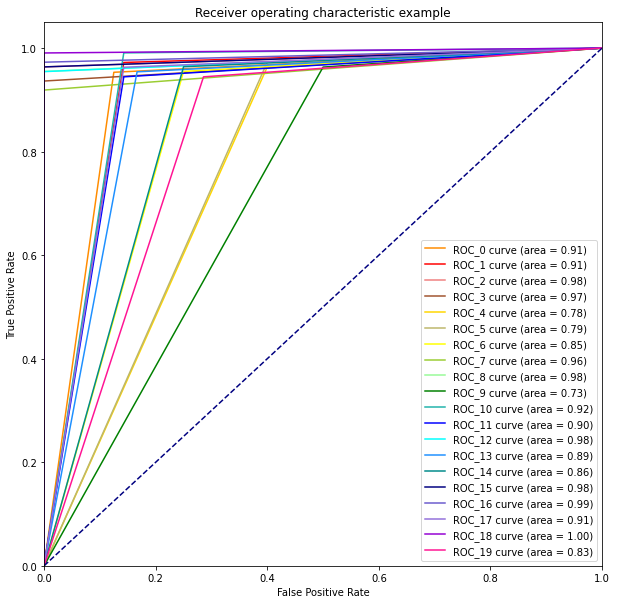

In [ ]:
our_binary_prediction = []
for i in final_label_list:
  our_binary_prediction.append(i)
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve,auc

# confusion_matrix(y_true, y_pred)
print ('Confusion Matrix :')
confusion_matrix = confusion_matrix(test_label_list, our_binary_prediction)
print(confusion_matrix)
print ('Accuracy Score is',accuracy_score(test_label_list, our_binary_prediction))
print ('Classification Report : ')
print (classification_report(test_label_list, our_binary_prediction))

fpr0,tpr0,threshold0 = roc_curve(y_test_0, y_test_pred_0) # calculate False Positive Rate and true Positive Rate
roc_auc0 = auc(fpr0,tpr0) # calculate AUC

fpr1,tpr1,threshold1 = roc_curve(y_test_1, y_test_pred_1)
roc_auc1 = auc(fpr1,tpr1)

fpr2,tpr2,threshold2 = roc_curve(y_test_2, y_test_pred_2)
roc_auc2 = auc(fpr2,tpr2) 

fpr3,tpr3,threshold3 = roc_curve(y_test_3, y_test_pred_3) 
roc_auc3 = auc(fpr3,tpr3) 

fpr4,tpr4,threshold4 = roc_curve(y_test_4, y_test_pred_4) 
roc_auc4 = auc(fpr4,tpr4) 

fpr5,tpr5,threshold5 = roc_curve(y_test_5, y_test_pred_5) 
roc_auc5 = auc(fpr5,tpr5) 

fpr6,tpr6,threshold6 = roc_curve(y_test_6, y_test_pred_6) 
roc_auc6 = auc(fpr6,tpr6) 

fpr7,tpr7,threshold7 = roc_curve(y_test_7, y_test_pred_7) 
roc_auc7 = auc(fpr7,tpr7) 

fpr8,tpr8,threshold8 = roc_curve(y_test_8, y_test_pred_8) 
roc_auc8 = auc(fpr8,tpr8) 

fpr9,tpr9,threshold9 = roc_curve(y_test_9, y_test_pred_9) 
roc_auc9 = auc(fpr9,tpr9) 

fpr10,tpr10,threshold10 = roc_curve(y_test_10, y_test_pred_10) 
roc_auc10 = auc(fpr10,tpr10) 

fpr11,tpr11,threshold11 = roc_curve(y_test_11, y_test_pred_11) 
roc_auc11 = auc(fpr11,tpr11) 

fpr12,tpr12,threshold12 = roc_curve(y_test_12, y_test_pred_12) 
roc_auc12 = auc(fpr12,tpr12) 

fpr13,tpr13,threshold13 = roc_curve(y_test_13, y_test_pred_13) 
roc_auc13 = auc(fpr13,tpr13) 

fpr14,tpr14,threshold14 = roc_curve(y_test_14, y_test_pred_14) 
roc_auc14 = auc(fpr14,tpr14) 

fpr15,tpr15,threshold15 = roc_curve(y_test_15, y_test_pred_15) 
roc_auc15 = auc(fpr15,tpr15) 

fpr16,tpr16,threshold16 = roc_curve(y_test_16, y_test_pred_16) 
roc_auc16 = auc(fpr16,tpr16) 

fpr17,tpr17,threshold17 = roc_curve(y_test_17, y_test_pred_17) 
roc_auc17 = auc(fpr17,tpr17) 

fpr18,tpr18,threshold18 = roc_curve(y_test_18, y_test_pred_18) 
roc_auc18 = auc(fpr18,tpr18) 

fpr19,tpr19,threshold19 = roc_curve(y_test_19, y_test_pred_19) 
roc_auc19 = auc(fpr19,tpr19) 


plt.figure()
# lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr0, tpr0, color='darkorange',
          label='ROC_0 curve (area = %0.2f)' % roc_auc0) 
plt.plot(fpr1, tpr1, color='red',
          label='ROC_1 curve (area = %0.2f)' % roc_auc1) 
plt.plot(fpr2, tpr2, color='lightcoral',
          label='ROC_2 curve (area = %0.2f)' % roc_auc2) 
plt.plot(fpr3, tpr3, color='sienna',
          label='ROC_3 curve (area = %0.2f)' % roc_auc3) 
plt.plot(fpr4, tpr4, color='gold',
          label='ROC_4 curve (area = %0.2f)' % roc_auc4) 
plt.plot(fpr5, tpr5, color='darkkhaki',
          label='ROC_5 curve (area = %0.2f)' % roc_auc5) 
plt.plot(fpr6, tpr6, color='yellow',
          label='ROC_6 curve (area = %0.2f)' % roc_auc6) 
plt.plot(fpr7, tpr7, color='yellowgreen',
          label='ROC_7 curve (area = %0.2f)' % roc_auc7) 
plt.plot(fpr8, tpr8, color='palegreen',
          label='ROC_8 curve (area = %0.2f)' % roc_auc8) 
plt.plot(fpr9, tpr9, color='green',
          label='ROC_9 curve (area = %0.2f)' % roc_auc9) 
plt.plot(fpr10, tpr10, color='lightseagreen',
          label='ROC_10 curve (area = %0.2f)' % roc_auc10) 
plt.plot(fpr11, tpr11, color='blue',
          label='ROC_11 curve (area = %0.2f)' % roc_auc11) 
plt.plot(fpr12, tpr12, color='cyan',
          label='ROC_12 curve (area = %0.2f)' % roc_auc12) 
plt.plot(fpr13, tpr13, color='dodgerblue',
          label='ROC_13 curve (area = %0.2f)' % roc_auc13) 
plt.plot(fpr14, tpr14, color='darkcyan',
          label='ROC_14 curve (area = %0.2f)' % roc_auc14) 
plt.plot(fpr15, tpr15, color='navy',
          label='ROC_15 curve (area = %0.2f)' % roc_auc15) 
plt.plot(fpr16, tpr16, color='slateblue',
          label='ROC_16 curve (area = %0.2f)' % roc_auc16) 
plt.plot(fpr17, tpr17, color='mediumpurple',
          label='ROC_17 curve (area = %0.2f)' % roc_auc17) 
plt.plot(fpr18, tpr18, color='darkviolet',
          label='ROC_18 curve (area = %0.2f)' % roc_auc18) 
plt.plot(fpr19, tpr19, color='deeppink',
          label='ROC_19 curve (area = %0.2f)' % roc_auc19)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 4.4 Improvement

Using Stratified sampling for spliting dataset into training and test set.

In [ ]:
from sklearn.utils import shuffle
import torch
import torch.utils.data
import sklearn
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
data_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
])

# Use ImageFolder to read
dataset = ImageFolder('/content/our_data/cropped', transform=data_transform)

all_img_list = []
all_label_list = []
for i in dataset:
  all_img_list.append(np.array(i[0]).flatten().tolist())
  all_label_list.append(i[1])

s_x_train,s_x_test,s_y_train,s_y_test = sklearn.model_selection.train_test_split(all_img_list,all_label_list,test_size = 0.2, random_state = 42, shuffle = True, stratify = all_label_list) #stratify
my_np_array = np.array(s_x_train) #training dataset array
my_label_np_array = np.array(s_y_train) #training label set array
test_my_np_array = np.array(s_x_test) #test dataset array
test_my_label_np_array = np.array(s_y_test) #test label set array

img_list = s_x_train
label_list = s_y_train
test_img_list = s_x_test
test_label_list = s_y_test

In [ ]:
print(my_np_array.shape)
print(my_label_np_array.shape)

(460, 10304)
(460,)


## 4.5 Compare with the result with using package Logistic Regression

Using Logestic Regression

In [ ]:
# Set up the classifier and train it by using training data
# classirfier = LogisticRegression(max_iter=10000)
classirfier = LogisticRegression(max_iter=1000)
lr = classirfier.fit(img_list,label_list)

In [ ]:
# print out the parameters in the logestic regression
print(lr.coef_)
print(lr.intercept_)

[[-1.88933544e-04 -1.84185537e-04 -1.67689390e-04 ...  3.28799770e-05
   1.87015654e-05  1.02707007e-05]
 [ 2.33541876e-04  2.28782729e-04  1.82381395e-04 ... -9.00015115e-05
  -1.24241914e-04 -1.46140110e-04]
 [-3.30361026e-05 -3.86901052e-05 -4.29521281e-05 ... -2.34325122e-04
  -2.15946288e-04 -2.19741512e-04]
 ...
 [-1.20038376e-04 -8.86126505e-05 -8.45552033e-05 ... -2.03294956e-04
  -1.29209833e-04 -1.14033370e-04]
 [ 5.59743570e-06 -6.01445355e-06 -9.04548255e-06 ...  2.48049615e-05
  -1.49099493e-05 -2.20378935e-05]
 [-3.61437950e-04 -3.64968869e-04 -3.72877482e-04 ...  2.04055285e-04
   2.07933258e-04  2.07098646e-04]]
[-9.96564121e-06 -1.84011123e-06 -5.23543274e-06 -2.05470926e-06
  1.94749124e-07  1.41871718e-06  1.57513080e-07  1.10001350e-08
  2.77663499e-06 -4.84942896e-07 -1.27119540e-06  3.08231964e-06
 -2.07999358e-06  2.23838697e-06  2.56509027e-06  5.30363986e-06
  1.19154953e-06 -2.40303040e-06  1.42456079e-06  4.97089511e-06]


In [ ]:
labels = lr.predict(test_img_list)

In [ ]:
# print out the predicted labels of the images in testing dataset
print(labels)
print(size(labels))

[17 13  7 16 19 16 18 16  7  6  9 15  0 12  3  9 13  4  2 10  4 11 17 14
 13 18 15 18  3  3 18 12 19 19  7 19  2 16 19  4 12  6 17 13 14  9 18  9
  9 18  0  1 12 17  2 17 13  1  9 19 17 16  1 14 10  9 15  7 19  2  0 11
  0  9 19 10 11  9 18 19  8 16 16 12 12 12  1  6 12 13 13  1 11 10 18  0
 19 18  5  6  7  9  0 13 16  5 13  5  0 12  1  2  3  1 18]
115


In [ ]:
print(test_label_list[0]) # print out the label of the first image in original testing dataset

17


Show the result

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
# confusion_matrix(y_true, y_pred)
print ('Confusion Matrix :')
confusion_matrix = confusion_matrix(test_label_list, labels)
print(confusion_matrix)
print ('Accuracy Score is',accuracy_score(test_label_list, labels))
print ('Classification Report : ')
print (classification_report(test_label_list, labels))

Confusion Matrix :
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

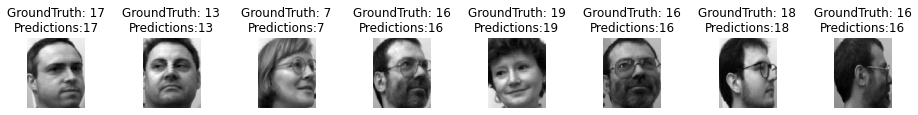

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=8)   # Visualization
plt.subplots_adjust(left=8, right=10, wspace=1)
for idx in range(8):
    ax[idx].imshow(test_dataset[idx][0], cmap='gray')
    ax[idx].axis('off')
    ax[idx].set_title(f'GroundTruth: {test_dataset[idx][1]}\nPredictions:{test_label_list[idx]}')

# 5. LDA Calculation

In [ ]:
# multi-class LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
X = np.array(img_list)
y = np.array(label_list)
print(X.shape)
print(y.shape)
# scaler = preprocessing.StandardScaler().fit(X)
# X_Standard=scaler.transform(X)
# print(X_Standard.shape)
lda = LinearDiscriminantAnalysis(n_components=10)
lda.fit(X,y)


(460, 10304)
(460,)


LinearDiscriminantAnalysis(n_components=10)

In [ ]:
X_lda = lda.transform(X)
print(X_lda)

[[-36.57668145   2.85497418   9.10314345 ...   1.51423191  -0.41100629
    4.6811748 ]
 [ 19.52926428  14.25668073   7.44440763 ...  -3.44527603  -0.20772402
    7.14201103]
 [-37.14632871   1.25253335   9.95754481 ...   1.38678517  -0.55058069
    2.51504523]
 ...
 [ -0.90412336  18.0964276   -7.19210279 ...   2.59932394   5.58255436
   -4.35363014]
 [ 17.85189136   9.13009489  -2.10227803 ...   0.64890501  -1.68369584
   -2.13092966]
 [  9.96191691  -6.69666144  -9.12156752 ...   2.68520739   1.23733167
    2.90230377]]


In [ ]:
print(X_lda.shape)

(460, 10)


In [ ]:

pre_y = lda.predict(test_my_np_array) #predict the result

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
# confusion_matrix(y_true, y_pred)
print ('Confusion Matrix :')
confusion_matrix = confusion_matrix(test_my_label_np_array, pre_y)
print(confusion_matrix)
print ('Accuracy Score is',accuracy_score(test_my_label_np_array, pre_y))
print ('Classification Report : ')
print (classification_report(test_my_label_np_array, pre_y))

Confusion Matrix :
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

Visulize the result for the first 10 images

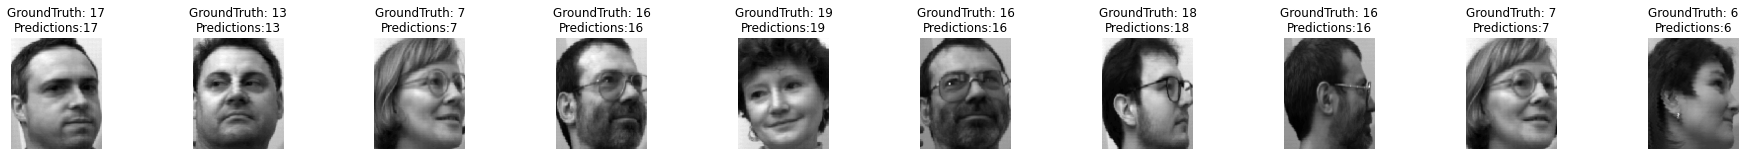

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=10)   # Visualization
plt.subplots_adjust(left=8, right=12, wspace=1)
for idx in range(10):
    ax[idx].imshow(test_dataset[idx][0], cmap='gray')
    ax[idx].axis('off')
    ax[idx].set_title(f'GroundTruth: {test_dataset[idx][1]}\nPredictions:{pre_y[idx]}')

LDA for Fisher-faces

In [ ]:
def mylda (X , y , num_components =0) :
    y = np.asarray(y)
    [n , d] = X.shape
    c = np.unique (y)
    if ( num_components <= 0) or ( num_components >( len (c) -1) ):
        num_components = (len (c) -1)
    meanTotal = X. mean ( axis =0)
    Sw = np . zeros ((d , d) , dtype = np . float32 )
    Sb = np . zeros ((d , d) , dtype = np . float32 )
    for i in c:
        Xi = X[np.where (y == i)[0],:]
        meanClass = Xi.mean ( axis =0)
        Sw = Sw + np.dot (( Xi - meanClass ).T,( Xi - meanClass ))
        Sb = Sb + n * np.dot (( meanClass - meanTotal ).T , ( meanClass - meanTotal ))
    eigenvalues , eigenvectors = np.linalg.eig ( np.linalg.inv(Sw)* Sb )
    idx = np . argsort ( -eigenvalues.real )
    eigenvalues , eigenvectors = eigenvalues [ idx ] , eigenvectors [: , idx ]
    eigenvalues = np . array ( eigenvalues [0: num_components ]. real , dtype = np . float32 , copy =
    True )
    eigenvectors = np . array ( eigenvectors [0: ,0: num_components ]. real , dtype = np . float32 ,
    copy = True )
    return [ eigenvalues , eigenvectors ]

In [ ]:
lda_result = mylda(X,y,19)

In [ ]:
print(lda_result[0])

[3.4087954e+21 1.4415541e+21 8.8391390e+20 8.8391390e+20 8.1693777e+20
 8.1693777e+20 5.7825920e+20 5.7825920e+20 4.6531793e+20 4.6531793e+20
 4.1859907e+20 3.8100404e+20 3.4097537e+20 3.4097537e+20 3.3238933e+20
 3.3238933e+20 3.2530436e+20 3.2530436e+20 3.2364609e+20]


In [ ]:

lda_eigenvalue = np.array(lda_result[0])
sorted_lda_eigenvalue = np.argsort(lda_eigenvalue)
print(sorted_lda_eigenvalue)

[18 16 17 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


In [ ]:
print(lda_result[1])

[[ 0.02677967  0.08626587 -0.0490532  ... -0.06566115 -0.06566115
   0.03020069]
 [ 0.02385977  0.01968745 -0.00060629 ... -0.00685137 -0.00685137
  -0.06119099]
 [ 0.0337103  -0.00216845  0.01811693 ...  0.00856591  0.00856591
   0.04600878]
 ...
 [ 0.01052125  0.01275198 -0.01718568 ... -0.01423863 -0.01423863
  -0.00853618]
 [-0.0123188   0.0104619   0.00671539 ...  0.00251532  0.00251532
   0.00473813]
 [-0.02595592 -0.00288534  0.0071747  ... -0.00108701 -0.00108701
   0.01960742]]


In [ ]:
print(np.array(lda_result[1]).shape)

(10304, 19)


In [ ]:
combine_component = []
for i in range(0,19):
  component = []
  for j in range(0,10304):
    component.append(lda_result[1][j][i])
  combine_component.append(component)
print(np.array(combine_component).shape)

(19, 10304)


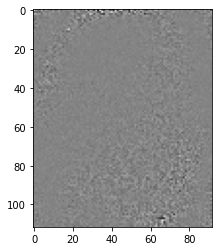

In [ ]:
plt.imshow(np.array(combine_component[1]).reshape(112,92),cmap = 'gray')

# Reference

1. Manual PCA: https://www.askpython.com/python/examples/principal-component-analysis

2. Binary logistic Regression:
https://www.cnblogs.com/geo-will/p/10468356.html

3. Manual LDA:
https://iq.opengenus.org/face-recognition-using-fisherfaces/
